# 1. Introduction
Please refer to my report.

# 2.	Data Source and Cleaning

### 2.1 Data Source
This dataset is about car collisions occurred in Seattle City from year 2004 to present. It is comprised of 194,673 records with 38 attributes which some of them will be used to train and test the machine learning model for this project. This dataset has unbalanced labels because some of them have missing data, and it has both categorical and nemerical types of data. The objective of this project is to build a classification modle to predict the severity of a unknow (or new) car collision based on a set of features selected. 

### 2.2 Data Cleaning

To balance the dataset for less biases and better predictabilty, several steps are taken for data cleaning.

2.2.1 For unbalance labels, remove rows with not useful values. This step results in downsizeing the dataset to 168,947 records from original size of 194,673.
1. Remove rows with missing values, including:\
(1) Column 'ADDRTYPE': 1,926 records\
(2) Column 'WEATHER' :5,081 records\
(3) Column 'ROADCOND' :5,012 records\
(4) Column 'LIGHTCOND' :5,170 records
2. Remove rows with small values which are not predictable for modeling.\
(1) Column 'VEHCOUNT', remove rows with values > 6.\
(2) Column 'PERSONCOUNT', remove rows with values > 10.
3. Remove rows in columns 'WEATHER', 'ROADCOND', and 'LIGHTCOND' which have values as 'Other', 'Unknown', and ' '.
 
2.2.2 Convert categorial values to numerial values for columns including: 'WEATHER', 'ROADCOND', 'LIGHTCOND', and 'ADDRTYPE'.  
 


### 2.3 Feature Selection
Since this dataset is about severity, so the attibute 'SEVERITYDESC'is labled as target variable - y. Among the remaining 37 attibutes, 6 of them are selected to the feature sets, including: 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'PERSONCOUNT', and 'VEHCOUNT'. Other 31 attibutes instead are dropped from the data frame file after cleaning.


## 3. Methodology 

### 3.1 Explortary Data Analysis
In the dataset, the target variable 'SEVERITYDESC' has only two types of value - 'Property Damage Only Collision' vs. 'Injury Collision', with records of 136,485 vs.58,188 for each class. After data cleaning, the number of each class is reduced to 113,546 and 55,401, by 16.8% and 4.8% respectively. This indicates the data cleaning has unbalanced impact on the target variables, which results in more records related to type I 'Property Damage Only Collsion' being dropped than those related to type II 'Injury Collision'. The reason seems to be the higher severity of a collision, the more accurate and complete data are available in this dataset. This unbalance of data between different levels of severity of collisions would create some biases for this modeling, which as a result affect the predictability of it.


### 3.2 Machine Learning Approach
This dataset is used to predict the possible outcome of a car collision. By applying classification algorithms to this dataset, a machine learning model is built to classify and predict the result. As this dataset contains mixed types of data - categorical and numerical values, KNN method is not an applicable approach. The Decision Trees method is used for modeling. The selected feature sets of this dataset are weather, road condition, light condition, address type, # of persons, and # of vehicles, and the target is the severity of collision which those features lead to. After spliting the dataset into training and testing part, the training part is used to build a decison tree which will predict the severity of a car colliosion.  

### 3.3 Code for Explortary Data Analysis and Machine Learning Modeling

#### This following code is mainly used for the capstone project.

In [1]:
#Import pandas and numpy
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
#Import needed packages
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Load data from CSV file
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9bf7c123d3aa41ebbc17579bed371d95 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oGSLq2nwjXKlUqLBrykBxfv-T2zohezS5n_CCybJT0hT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9bf7c123d3aa41ebbc17579bed371d95.get_object(Bucket='courseracapstonejw-donotdelete-pr-85ubjvlwfabry5',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data1= pd.read_csv(body)
df_data1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Explortary Data Analysis - Understnd dataset
df_data1.shape
df_data1.describe()
df_data1.isnull().sum()
df_data1.dtypes
df_data1['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

#### Data Cleaning and Pre-processing


In [5]:
# Select some features to explore and drop rows with missing values
cdf_data1=df_data1[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','PERSONCOUNT','VEHCOUNT','SEVERITYDESC']]
cdf_data1= cdf_data1.dropna()
cdf_data1.head()


,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYDESC
0,Overcast,Wet,Daylight,Intersection,2,2,Injury Collision
1,Raining,Wet,Dark - Street Lights On,Block,2,2,Property Damage Only Collision
2,Overcast,Dry,Daylight,Block,4,3,Property Damage Only Collision
3,Clear,Dry,Daylight,Block,3,3,Property Damage Only Collision
4,Raining,Wet,Daylight,Intersection,2,2,Injury Collision


In [6]:
#Removing rows with values in low relevance, including"Other", "Unknow", and " ".

cdf_data1=cdf_data1.drop(cdf_data1[cdf_data1.WEATHER.isin(["Other","Unknown", " "])].index)

cdf_data1=cdf_data1.drop(cdf_data1[cdf_data1.ROADCOND.isin(["Other","Unknown"," "])].index)

cdf_data1=cdf_data1.drop(cdf_data1[cdf_data1.LIGHTCOND.isin(["Other","Unknown"," "])].index)
cdf_data1.shape

(169247, 7)

In [7]:
#Remove rows with value > 6 in columns'VEHCOUNT', and value >10 in column 'PERSONCOUNT'
cdf_data1=cdf_data1.drop(cdf_data1[cdf_data1.VEHCOUNT>6].index)
cdf_data1=cdf_data1.drop(cdf_data1[cdf_data1.PERSONCOUNT>10].index)
cdf_data1.shape

(168947, 7)

In [8]:
#Count how many of each class in target variable after data cleaning
cdf_data1['SEVERITYDESC'].value_counts()


Property Damage Only Collision    113546
Injury Collision                   55401
Name: SEVERITYDESC, dtype: int64

In [9]:
#Set X as feature matrix (data of cdf_data1)
X=cdf_data1[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','PERSONCOUNT','VEHCOUNT']].values
X[0:5]

array([['Overcast', 'Wet', 'Daylight', 'Intersection', 2, 2],
       ['Raining', 'Wet', 'Dark - Street Lights On', 'Block', 2, 2],
       ['Overcast', 'Dry', 'Daylight', 'Block', 4, 3],
       ['Clear', 'Dry', 'Daylight', 'Block', 3, 3],
       ['Raining', 'Wet', 'Daylight', 'Intersection', 2, 2]], dtype=object)

In [10]:
#Convert Categorical values to numerical values.
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing'])
X[:,0]=le_WEATHER.transform(X[:,0])

le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(['Dry','Ice','Oil','Sand/Mud/Dirt','Snow/Slush','Standing Water','Wet'])
X[:,1]=le_ROADCOND.transform(X[:,1])

le_LIGHTCOND=preprocessing.LabelEncoder()
le_LIGHTCOND.fit(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On', 'Dark - Unknown Lighting','Dawn','Daylight','Dusk'])
X[:,2]=le_LIGHTCOND.transform(X[:,2])

le_ADDRTYPE=preprocessing.LabelEncoder()
le_ADDRTYPE.fit(['Alley','Block','Intersection'])
X[:,3]=le_ADDRTYPE.transform(X[:,3])



X[0:5]

array([[3, 6, 5, 2, 2, 2],
       [5, 6, 2, 1, 2, 2],
       [3, 0, 5, 1, 4, 3],
       [1, 0, 5, 1, 3, 3],
       [5, 6, 5, 2, 2, 2]], dtype=object)

In [11]:
#Set y as response vector (Target variable)
y=cdf_data1["SEVERITYDESC"]
y[0:5]

0                  Injury Collision
1    Property Damage Only Collision
2    Property Damage Only Collision
3    Property Damage Only Collision
4                  Injury Collision
Name: SEVERITYDESC, dtype: object

#### Decison-tree Modeling

In [12]:
#Dataset is divided into train set and test set 
from sklearn.model_selection import train_test_split
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y, test_size=0.2, random_state=3)

In [13]:
#Create a tree model 'SEVERITYtree' and find the best depth 
from sklearn import metrics
depth = 20
accuracy =0.0
best_depth =0
mean_accd = np.zeros((depth-1))
std_accd=np.zeros((depth-1))
for n in range (1,depth):
    SEVERITYtree=DecisionTreeClassifier(criterion='entropy', max_depth = n)
    SEVERITYtree.fit(X_trainset,y_trainset)
    PREDICTtree=SEVERITYtree.predict(X_testset)
    accuracy_n_depth=metrics.accuracy_score(y_testset,PREDICTtree)
    mean_accd[n-1] = metrics.accuracy_score(y_testset,PREDICTtree)
    std_accd[n-1] = np.std(PREDICTtree==y_testset)/np.sqrt(PREDICTtree.shape[0])
    if accuracy_n_depth > accuracy and n > 2:
        accuracy = accuracy_n_depth
        best_depth = n
print('Best depth:',best_depth)

#Create a decison tree called 'SEVERITYtree', set max_depth =4, instead of best depth of 7
SEVERITYtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
SEVERITYtree

Best depth: 7


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
#Fit the decison tree on the trainset data
SEVERITYtree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#Predit on the testset data and save the result into varible 'PREDICTtree'
PREDICTtree=SEVERITYtree.predict(X_testset)
print(PREDICTtree[0:5])
print(y_testset[0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
110986    Property Damage Only Collision
147313    Property Damage Only Collision
7971                    Injury Collision
64893     Property Damage Only Collision
40965     Property Damage Only Collision
Name: SEVERITYDESC, dtype: object


In [16]:
#Evaluate the accuracy of the tree model
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy :", metrics.accuracy_score(y_testset,PREDICTtree))

DecisionTree's Accuracy : 0.7217815921870376


In [17]:
#Visualize the tree model
!pip install pydotplus
!pip install graphviz

     |████████████████████████████████| 286kB 9.7MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


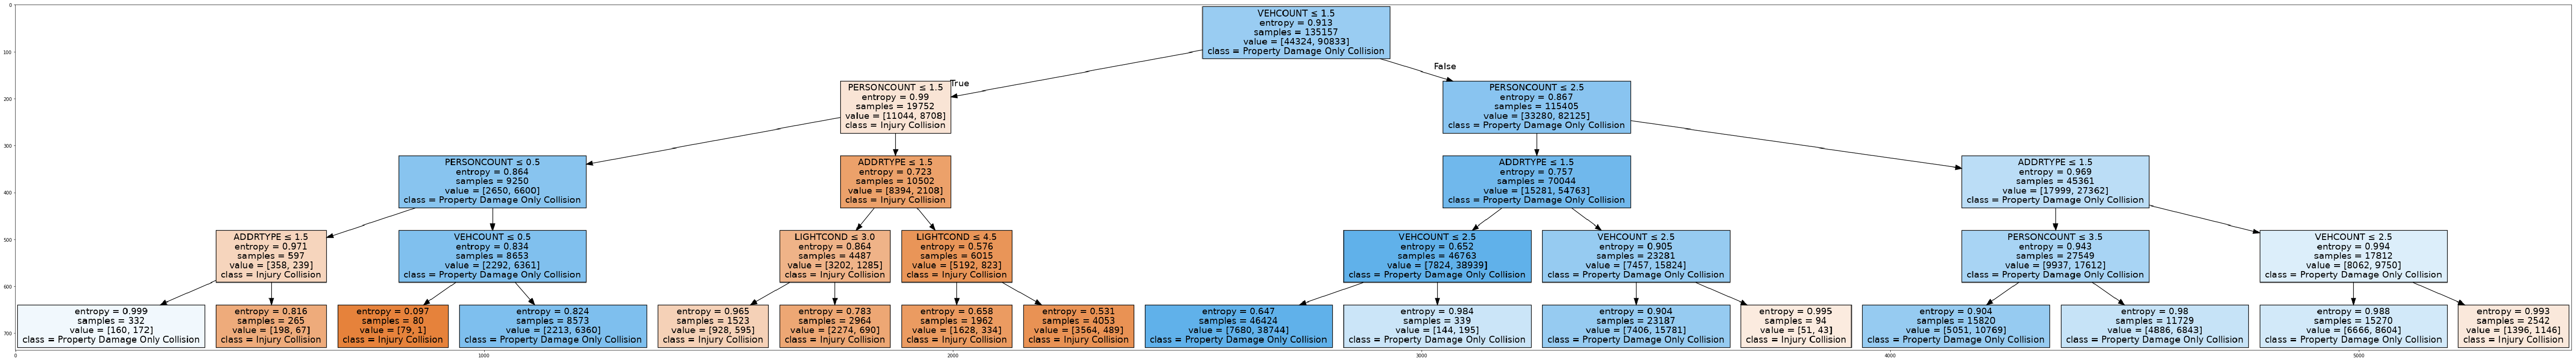

In [18]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

dot_data=StringIO()
filename = 'SEVERITYtree.png'
featureNames=cdf_data1.columns[0:6]
targetNames=cdf_data1['SEVERITYDESC'].unique().tolist()
out=tree.export_graphviz(SEVERITYtree,feature_names=featureNames, out_file=dot_data,class_names=np.unique(y_trainset), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation='nearest')


# 4. Results


The Decison Trees classification approach is predictive for this project - with an accuracy rate of 72.2% (max_depth =4). The severity of a car collision is highly related to 3 key features: VEHCOUNT(number of vehicles), PERSONCOUNT(number of persons), ADDRTYPE(the address type). 
 1. When ADDRTYPE is not <=1.5 and VEHCOUNT is not <=2.5 (car collision at an 'Intersection' with 3 or more cars involved), the possible outcome is predicted as a severe one - Injury Collision, although 'entropy' is more than 0.90.
 2. When ADDRTYPE is <=1.5 (car collision at 'Block' or 'Alley' ), the possible outcome is predicteds as a less severe one - Property Damage Only Collision, 'entropy' is high (more than 0.90),  except one senario:
 *If the number of persons involved in a car collision is two or less,and two cars involved, then 'entropy' =0.647, which indicates most of the cases are less severe ones.\
 3.When VEHCOUNT is <=1.5 and PERSONCOUNT is not <=1.5 (car collision involves only one or none car, but two or more persons), this model   predicts the outcome as severe one, and the 'entropy' is usually low (0.531 ~0.783) with one exception:\
 *LIGHTCOND is <=3.5 (light condition is dark), then 'entropy' =0.965, which means the prediction is not highly accurate for such case.
 4.When PERSONCOUNT is <=1.5 and not <=0.5 (car collision involves only one person), the number of cars involved makes big differenc in the ourcome.\
 * VEHCONT is <=0.5 (no car involved), this model predicts the outcome as severe one with almost 100% accurate rate, 'entropy' = 0.097.\
 * VEHCONT is <=1.5 and not <=0.5 (one car involved), this modle predicts the outcome as less severe one with 'entropy' =0.824.\
5.when PERSONCOUNT is <=0.5 and ADDRTYPE is not <=1.5 (car collision involes none person at 'Intersection'), the most possible outcome is severe one with 'entropy'=0.816. 



# 5. Discussions of Observations and Recommendations
Please refer to my report.

# Conclusion
please refer to my report.

In [19]:
#The End.


# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_9bf7c123d3aa41ebbc17579bed371d95.get_object(Bucket='courseracapstonejw-donotdelete-pr-85ubjvlwfabry5', Key='IBM Data Science Professional Certificate - Capstone Project.docx')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 
